# DTSC 5501 - Group Project #1

# Imports

In [ ]:
import sys
sys.path.append("src/")
from LinkedList import LinkedList
from Event import Event
from ArrayList import ArrayList
from GenerateData import create_event_dataset
import matplotlib.pyplot as plt
import random
import time
import pandas as pd

## Part A

To begin, we will initialize a test event, the Array-Based List, and the Linked List.

In [ ]:
test_event = Event(1, "Meeting", "2023-10-01", "10:00", "11:00", "Conference Room")
next_event = Event(2, "Class", "2025-10-01", "11:15", "12:00", "KOBL 231")
early_event = Event(4, "Conversation", "2024-10-01", "11:05", "11:14", "Virtual")


events = [test_event, next_event, early_event]

ll = LinkedList()
arr = ArrayList()


We can insert events into both lists by calling their respective `.insert()` methods. Further, we can call the `.list_all()` method to print the contents of both lists.

In [ ]:
for event in events:
    ll.insert(event)
    arr.insert(event)

print("Linked List Contents\n")
ll.list_all()

print("\n\n\nArray-based List Contents\n")
arr.list_all()

Linked List Contents


        Events shown below:
        
        -----------------------------------
        
        1: Meeting on 2023-10-01 from 10:00 to 11:00 at Conference Room

	-----------------------------------

	2: Class on 2025-10-01 from 11:15 to 12:00 at KOBL 231

	-----------------------------------

	4: Conversation on 2024-10-01 from 11:05 to 11:14 at Virtual

	-----------------------------------

	



Array-based List Contents


        Events shown below:
        
        -----------------------------------
        
        1: Meeting on 2023-10-01 from 10:00 to 11:00 at Conference Room

	-----------------------------------

	2: Class on 2025-10-01 from 11:15 to 12:00 at KOBL 231

	-----------------------------------

	4: Conversation on 2024-10-01 from 11:05 to 11:14 at Virtual

	-----------------------------------

	


We can delete items from both lists by calling their respetive `.delete()` methods. The function requires a idx argument, which dictates which event is to be removed. Calling `.delete(0)` removes the item at index 0 from each list. To demonstrate, let's delete event at index 1 from the array and event at index 0 from the linked list.

In [ ]:
ll.delete(0)
arr.delete(1)

print("Linked List Contents After Deletion of Event 0\n")
ll.list_all()

print("\n\n\nArray-based List Contents After Deletion of Event 1\n")
arr.list_all()

Linked List Contents After Deletion of Event 0


        Events shown below:
        
        -----------------------------------
        
        2: Class on 2025-10-01 from 11:15 to 12:00 at KOBL 231

	-----------------------------------

	4: Conversation on 2024-10-01 from 11:05 to 11:14 at Virtual

	-----------------------------------

	



Array-based List Contents After Deletion of Event 1


        Events shown below:
        
        -----------------------------------
        
        1: Meeting on 2023-10-01 from 10:00 to 11:00 at Conference Room

	-----------------------------------

	4: Conversation on 2024-10-01 from 11:05 to 11:14 at Virtual

	-----------------------------------

	


Let's add back both events. We can search through each list by calling the `.search_by_id()` method. This function requires both an id and a method argument. Id corresponds to the specific item that we want to find. Method corresponds to the search algorithm we want to use. This can be either 'linear' or 'binary'.

Note: Prior to executing binary search, both lists are sorted.

In [ ]:
ll.insert(test_event, 0)
arr.insert(next_event, 1)
print("Linked List Contents After Re-inserting Event 0\n")
ll.list_all()
print("\n\n\nArray-based List Contents After Re-inserting Event 1\n")
arr.list_all()

Linked List Contents After Re-inserting Event 0


        Events shown below:
        
        -----------------------------------
        
        1: Meeting on 2023-10-01 from 10:00 to 11:00 at Conference Room

	-----------------------------------

	2: Class on 2025-10-01 from 11:15 to 12:00 at KOBL 231

	-----------------------------------

	4: Conversation on 2024-10-01 from 11:05 to 11:14 at Virtual

	-----------------------------------

	



Array-based List Contents After Re-inserting Event 1


        Events shown below:
        
        -----------------------------------
        
        1: Meeting on 2023-10-01 from 10:00 to 11:00 at Conference Room

	-----------------------------------

	2: Class on 2025-10-01 from 11:15 to 12:00 at KOBL 231

	-----------------------------------

	4: Conversation on 2024-10-01 from 11:05 to 11:14 at Virtual

	-----------------------------------

	


In [ ]:
lin_item = ll.search_by_id(2, 'linear')
print(f"\n\nLinked List Linear Search Result for Event 2: {lin_item}\n")

Event 2 found in 2 attempts (0.0000 seconds)


Linked List Linear Search Result for Event 2: 2: Class on 2025-10-01 from 11:15 to 12:00 at KOBL 231



In [ ]:
bin_item = arr.search_by_id(2, 'binary')
print(f"\n\nArray-based List Binary Search Result for Event 2: {bin_item}\n")

Event 2 found in 1 attempts (2.1457672119140625e-06 seconds) 


Array-based List Binary Search Result for Event 2: 2: Class on 2025-10-01 from 11:15 to 12:00 at KOBL 231



If a user accidentally provides an invalid search method. The function returns with an error and instructs the user on what the valid args are.

In [ ]:
invalid_search_item = arr.search_by_id(2, 'random')
print(f"\n\nArray-based List Random Search Result for Event 2: {invalid_search_item}\n")

ERROR: Invalid search method
Acceptable values: [linear, binary]


Array-based List Random Search Result for Event 2: None



If the user searches for an item that doesn't exist. The function returns an error indicating that the event was not found.

In [ ]:
fake_item = arr.search_by_id(13, 'binary')
print(f"\n\nArray-based List Binary Search Result for Fake Event 13: {fake_item}\n")

ERROR: Event not found


Array-based List Binary Search Result for Fake Event 13: None



## Part B

In [ ]:
tests = [50, 500, 5000, 50000]
methods = ["merge", "quick", "insertion"]
arr_results = {m: [] for m in methods}
ll_results = {m: [] for m in methods}

The code below runs each sorting algorithm for each type of list (ArrayList and LinkedList). The values are recorded in a dictionary.

In [ ]:

for test in tests:
    arrs = create_event_dataset(test, "array")
    lls = create_event_dataset(test, "ll")
    for method in methods:
        start = time.time()
        arrs.sort_list(by="id", method=method)
        end = time.time()
        arr_results[method].append(end - start)

        start = time.time()
        lls.sort_list(by="id", method=method)
        end = time.time()
        ll_results[method].append(end - start)


Below is a plot visualizing the sorting performance on the array list. It can be seen that the insertion sort performed significantly worse than the other sorting algorithms. Note that the yaxis is on a log scale.

Another consideration is that our insertion sort implementation modified the list in place, whereas the others returned a new instance of an ArrayList that was sorted.

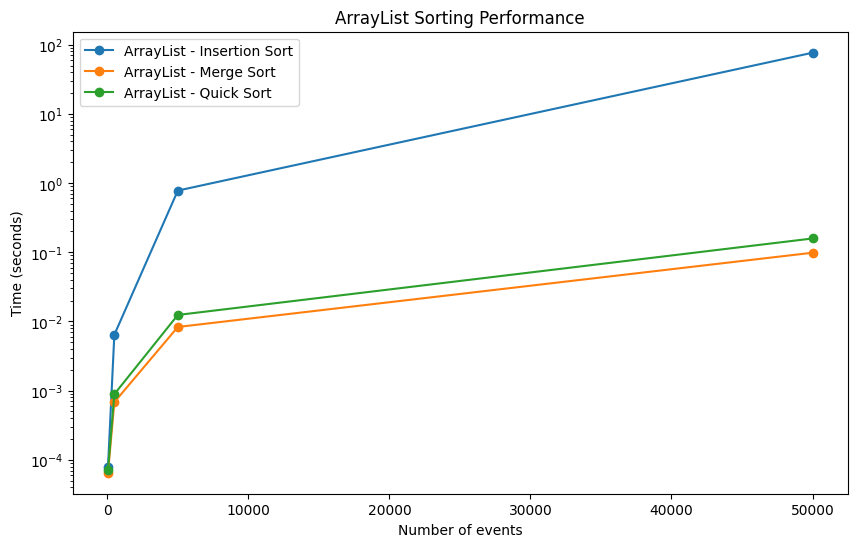

In [ ]:
plt.figure(figsize=(10, 6))

for method, times in arr_results.items():
    plt.plot(tests, times, marker='o', label=f'ArrayList - {method.capitalize()} Sort')

plt.xlabel("Number of events")
plt.ylabel("Time (seconds)")
plt.title("ArrayList Sorting Performance")
plt.legend()
plt.yscale('log')

The plot below shows the results of the experiment for the Linked List. Each algorithm performed similarly, with quick sort slightly performing the worst and Insertion sort performing the best.

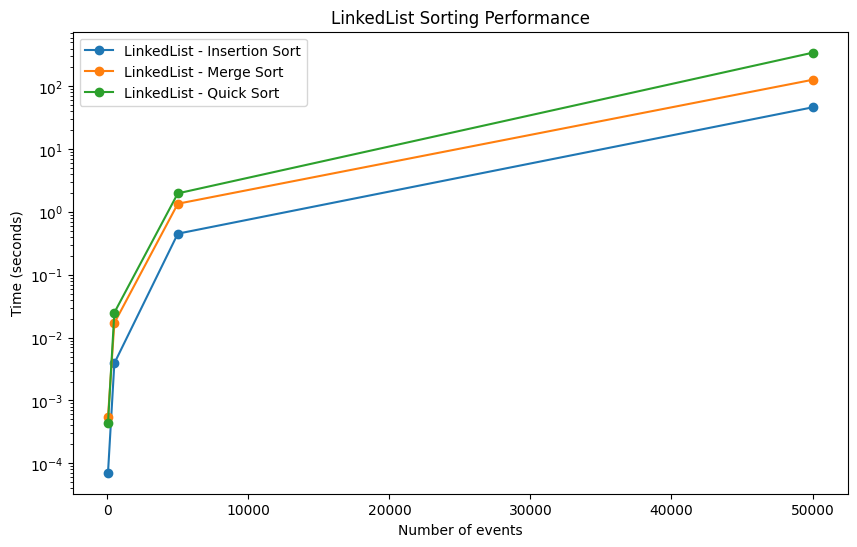

In [ ]:
plt.figure(figsize=(10, 6))

for method, times in ll_results.items():
    plt.plot(tests, times, marker='o', label=f'LinkedList - {method.capitalize()} Sort')

plt.xlabel("Number of events")
plt.ylabel("Time (seconds)")
plt.title("LinkedList Sorting Performance")
plt.legend()
plt.yscale('log')

The code below displays a table with sorting times for each algorithm and class. Note that sorting the array list was generally more efficient than sorting the linked list. This may be due to the additional memory overhead associated with the linked list.

In [ ]:
results_df = pd.DataFrame({
    "ArrayList_Merge": arr_results["merge"],
    "ArrayList_Quick": arr_results["quick"],
    "ArrayList_Insertion": arr_results["insertion"],
    "LinkedList_Merge": ll_results["merge"],
    "LinkedList_Quick": ll_results["quick"],
    "LinkedList_Insertion": ll_results["insertion"],
}, index=tests)
results_df

,ArrayList_Merge,ArrayList_Quick,ArrayList_Insertion,LinkedList_Merge,LinkedList_Quick,LinkedList_Insertion
50,0.000065,0.000071,0.000079,0.000548,0.000435,0.000071
500,0.000681,0.000890,0.006430,0.017107,0.025037,0.003915
5000,0.008327,0.012422,0.779949,1.355914,1.982653,0.452509
50000,0.098605,0.158404,76.719362,127.378363,343.551531,46.399254


## Part C

### Search by ID

#### Linear Search

In [ ]:
# Sample dataset of events
n=10000
events_a = create_event_dataset(n, "array")
events_l = create_event_dataset(n, "ll")

random.seed(93)
id_to_search = random.randint(1,n)

##### Array-based List

In [ ]:
# Searching unsorted data
test_search = events_a.search_by_id(id_to_search, "linear")

Event 8100 found in 7142 attempts (0.0006220340728759766 seconds)


In [ ]:
# Searching sorted data
sorted_events_a = events_a.sort_list(by="id", method="merge")
test_search = sorted_events_a.search_by_id(id_to_search, "linear")

Event 8100 found in 8100 attempts (0.00028896331787109375 seconds)


In certain cases where the `id_to_search` is indexed lower in an unsorted array list than in a sorted array list, searching the unsorted data is more efficient. This is not to be expected in all cases and it is probably wiser in the long run to sort before searching.

##### Singly-linked List

In [ ]:
# Searching unsorted data
test_search = events_l.search_by_id(id_to_search, "linear")

Event 8100 found in 1061 attempts (0.0002 seconds)


In [ ]:
# Searching sorted data
sorted_events_l = events_l.sort_list(by="id", method="merge")
test_search = sorted_events_l.search_by_id(id_to_search, "linear")

Event 8100 found in 8100 attempts (0.0004 seconds)


Despite the sorted approach taking more attempts, this method of searching sorted data ultimately took less time than searching the unsorted data in fewer attempts.

#### Binary Search

##### Array-based List

Binary Search only works on sorted datasets so we will only explore this search method on sorted data

In [ ]:
# Searching sorted data
sorted_events_a = events_a.sort_list(by="id", method="merge")
test_search = sorted_events_a.search_by_id(id_to_search, "binary")

Event 8100 found in 11 attempts (2.86102294921875e-06 seconds) 


##### Singly-linked List

Binary Search only works on sorted datasets so we will only explore this search method on sorted data

In [ ]:
# Searching sorted data
sorted_events_l = events_l.sort_list(by="id", method="merge")
test_search = sorted_events_l.search_by_id(id_to_search, "binary")

Event 8100 found in 11 attempts (0.0035 seconds)
8100: Event KYN on 2027-09-03 from 11:30 to 14:00 at New Orleans


The binary search algorithm for a singly-linked list is less efficient than for an array-based list. This is due to needing to traverse the list with `.next` to get to new indices, rather than accessing directly like with an array-based list.

### Conflict Detection

#### Array-based List

##### Complexity
The algorithm for conflict detection on array-based lists begins by merge sorting events by date; this method has time complexity of $O(n log(n))$

The nested loop over events has time complexity $O(n^2)$ in the worst case. However, since the loop breaks when dates do not match, actual complexity will be lower. In the best case where all events are on a different date, complexity would be $O(n)$. In the average case, complexity will be close to $O(n\cdot k)$ where $k$ is the average number of events per day. Since `create_event_dataset` spreads events over 4 years, $k = \frac{n}{4 \cdot 365} = \frac{n}{1460}$ events/day.

Therefore, `detect_conflicts()` has overall complexity (average case) of $O(n\cdot log(n) + n\cdot \frac{n}{1460})$

In the worst case, complexity is $O(n\cdot log(n) + n^2) \Rightarrow O(n^2)$

##### Optimizations
We optimized this method by sorting events by date before checking for conflicts. This reduces the number of checks required by quickly eliminating events on different dates.

In [ ]:
arr = ArrayList()
# Add conflicting events
arr.insert(Event(11, "Meeting A", "2025-10-14", "09:00", "10:00", "Room 1")) # conflicts with 2
arr.insert(Event(12, "Meeting B", "2025-10-14", "09:30", "10:30", "Room 2")) # conflicts with 1,3,4
arr.insert(Event(13, "Meeting C", "2025-10-14", "10:15", "11:00", "Room 3")) # conflicts with 2,4
arr.insert(Event(14, "Meeting D", "2025-10-14", "10:00", "10:30", "Room 4")) # conflicts with 2,3,4
arr.insert(Event(15, "Meeting E", "2025-10-15", "09:00", "10:00", "Room 5")) # no conflict (different day)

# Test for conflicts
conflicts = arr.detect_conflicts()
if conflicts:
    for e1, e2 in conflicts:
        print(f"- {e1.title} conflicts with {e2.title} on {e1.date}")
else:
    print("No conflicts detected")

4 conflicts identified in 2.4080276489257812e-05 seconds
- Meeting A conflicts with Meeting B on 2025-10-14
- Meeting B conflicts with Meeting C on 2025-10-14
- Meeting B conflicts with Meeting D on 2025-10-14
- Meeting C conflicts with Meeting D on 2025-10-14


In [ ]:
# Test on 10,000 events
events = create_event_dataset(10000, "array")
# Test for conflicts
conflicts = events.detect_conflicts()

5806 conflicts identified in 0.0568079948425293 seconds


#### Singly-linked List

##### Complexity

Before optimization, time complexity was $O(n^2)$

After optimization, time complexity is $O(n + m^2)$ where $m$ is events per date. In the case of 10,000 events spread over 4 years (this is what `create_event_dataset` produces), we should only average $m \approx 7$ events per day. This adds negligible complexity for n=10,000.

##### Optimizations

I needed to optimize the base conflict-detection algorithm for Array-based lists to run efficiently on Singly-linked lists with up to 10,000 nodes. Prior to optimization,  `_detect_conflicts()` took approximately 30 seconds to run on 10,000 events. After optimization, runtime is down to fractions of a second. This was achieved by initially grouping events by date. This reduces the number of comparisons required: instead of comparing every event against every other, we only compare events on the same day.

In [ ]:
ll = LinkedList()
# Add conflicting events
ll.insert(Event(11, "Meeting A", "2025-10-14", "09:00", "10:00", "Room 1")) # conflicts with 12
ll.insert(Event(15, "Meeting E", "2025-10-15", "09:00", "10:00", "Room 5")) # no conflict (different day)
ll.insert(Event(12, "Meeting B", "2025-10-14", "09:30", "10:30", "Room 2")) # conflicts with 11,13,14
ll.insert(Event(13, "Meeting C", "2025-10-14", "10:15", "11:00", "Room 3")) # conflicts with 12,14
ll.insert(Event(14, "Meeting D", "2025-10-14", "10:00", "10:30", "Room 4")) # conflicts with 12,13,14

# Test for conflicts
conflicts = ll._detect_conflicts()
if conflicts:
    for e1, e2 in conflicts:
        print(f"- {e1.title} conflicts with {e2.title} on {e1.date}")
else:
    print("No conflicts detected")

4 conflicts detected in 1.71661376953125e-05 seconds
- Meeting A conflicts with Meeting B on 2025-10-14
- Meeting B conflicts with Meeting C on 2025-10-14
- Meeting B conflicts with Meeting D on 2025-10-14
- Meeting C conflicts with Meeting D on 2025-10-14


In [ ]:
# Test on 10,000 events
events = create_event_dataset(10000, "ll")
# Test for conflicts
conflicts = events._detect_conflicts()

5810 conflicts detected in 0.029371976852416992 seconds


#### Tests

In [ ]:
sys.path.append("tests/")
from BinarySearch_test import test_pos_binary_search_by_id
test_pos_binary_search_by_id()

Event 1 found in 13 attempts (0.0004 seconds)
1: Event A on 2028-09-10 from 15:00 to 16:00 at Barcelona


In [ ]:
from BinarySearch_test import test_neg_binary_search_by_id
test_neg_binary_search_by_id()

ERROR: id must be integer
ERROR: Event ID not found


In [ ]:
from LinearSearch_test import test_pos_linear_search_by_id
test_pos_linear_search_by_id()

Event 17 found in 2508 attempts (0.0002 seconds)


In [ ]:
from LinearSearch_test import test_neg_linear_search_by_id
test_neg_linear_search_by_id()

ERROR: Event ID not found
ERROR: Event ID not found


## Part D

Scenario:

Our boss wants the Campus Event Scheduling System to scale up to 1 million events. We therefore analyse the memory usage for the array-list and the linked-list, suggest any structural optimizations, and sketch a design for parallel conflict detection using multiple cores.

## **1. Memory Usage Estimation**

Each *Event* object stores an ID, title, date, time, and location. Let's assume:

Each object roughly stores:

•	an ID (i.e. int type): 4 bytes

•	title, date, time, location: ~100 bytes total (i.e. strings + references)

•	Object overhead in Python: ~60 bytes (it is the extra memory that Python uses to store information about our data - not the data itself, ex: type of data etc.)

Therefore, that is approx. **170 bytes per Event** (which is a rough estimate).

**Array-List (Python List):**

•	Python lists store pointers to objects and not the objects themselves.

•	Each pointer (or) reference takes ~ 8 bytes.

•	So, total memory estimation = 1,000,000 events * (170 bytes per Event + 8 bytes per reference) **~ 178 MB total** (approx.)

**Linked List:**

Each node stores:

•	Reference to Event (~ 8 bytes)

•	Reference to the next node (~ 8 bytes)

•	Python object overhead (~ 60 bytes) i.e. ~ 76 bytes per node.

•	So, total memory estimation = 1,000,000 events * (170 bytes per Event + 76 bytes per node) **~ 246 MB total** (approx.)


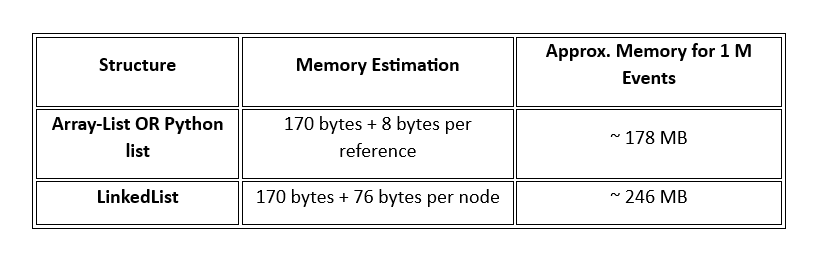

Extra Memory Requirement = (246 - 178) / 178 x 100 = 38.2%

Thus, the linked-list implementation requires **~38%** more memory than the array-list for 1M events.

**Why the Array-List Is More Memory Efficient?**

The main reason is that an Array-List uses fewer extra memory references when compared to a linked list.

**Array-List Memory Use:**

•	Each event in an array-list only needs one reference (a pointer in the list).

•	Python lists keep their elements together in one continuous block of memory.

•	The additional space used per event is about **8 bytes**.

•	So, for every event, the total extra memory required is roughly **8 bytes**.

**Linked List Memory Use:**

•	Each linked list node holds two references: one to the event and one to the next node.

•	Every node also has its own small Python object overhead (around 60 bytes).

•	Altogether, each event in a linked list uses about **76 extra bytes** (8 + 8 + 60).

**Why This Matters?**

•	With one million events, the linked list would use roughly **68 MB more memory** than an array-list.

•	That’s about a **38%** increase in memory use.

•	At even larger scales, like one billion events, this difference could reach **68 GB**, which is significant.

**Access Speed**

•	Array-lists keep data stored together, so the computer can access nearby items quickly.

•	Linked lists spread their data across memory, which slows access.

•	In real use, array-lists can be **2–5 times faster** for sequential reading and processing.

**Conclusion:**

•	Array-list uses less memory (~ 178 MB).

•	Linked List uses more memory (~ 246 MB). That is due to extra node objects and pointers.

•	Also, Array-list has better cache locality and faster sequential access.

## **2. Suggested Optimizations for Large-Scale Data**

### **i) Indexing by Date or Event ID:**

We can maintain an *Index Dictionary* for quick lookup:

*index = {event.id: event}*

This avoids using the linear or binary search and also reduces the search time to $O(1)$.

**Big-O Complexity Comparison:**

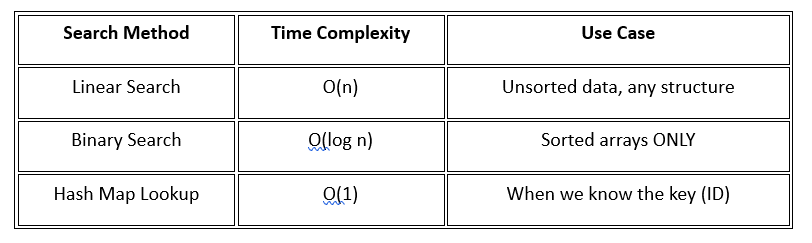

Binary search works very well with arrays but not with linked lists.

•	**In arrays**, we can go straight to the middle element in constant time $O(1)$ using its index.

*Example: mid_element = array[len(array)//2]*

This gives us the midpoint right away.

•	**In linked lists**, we can’t jump directly to the middle. We have to move through each node one by one until we reach the halfway point, which takes $O(n)$ time.

Because of this, doing binary search on a linked list ends up taking $O(n log n)$ time instead of $O(log n)$.

That means it’s not really faster than a simple linear search.

### **ii) Hybrid Structure:**

We can use an *Array-List* (or Python List) for the main storage of events (good for sorting of events) and a *HashMap* (or Dictionary) for direct access or lookups of the events.

•	**Array List:** It keeps a chronological order and stores the items in order - for ex., sorted by date or time. It is great for sorting the elements because they are stored contiguously in memory, making the sorting algorithms faster. But searching for a specific event (ex - event with event_ID = 12345) would take $O(n)$ time if we go one by one.

•	**HashMap:** It helps with a quick ID lookup. In Python, this is basically a Dictionary which stores data as key-value pairs - for ex., *{event_id: event_object}*. We can instantly access any event if we know its ID in $O(1)$ average time. But HashMaps are unordered, so we cannot easily sort or iterate it in order.

**Why Quick Sort Works Best for Arrays?**

•	It can rearrange elements directly in the array using their index positions.

•	On average, it runs in $O(n log n)$ time and is often faster than merge sort in real cases.

•	Arrays store data in a continuous block of memory, which helps the computer read it faster.

•	It uses less extra memory compared to merge sort.

**Why Merge Sort Works Best for Linked Lists?**

•	It can split the list easily by following the next pointers, so there’s no need to use indexes.

•	It doesn’t depend on random access to find the middle of the list.

•	When two sorted linked lists are merged, it only takes $O(n)$ time and doesn’t need extra space.

•	The overall time complexity stays $O(n log n)$ for linked lists.

Putting them together (i.e. the hybrid structure idea), we can use both the structures at the same time:

***array_list = [] # keeps events sorted by date/time***

***event_map = {}   # quick lookup by the event ID***

When we add a new event:

•	We append it to the array_list (and later sort it if needed)

•	And then we add it to the event_map with its ID as the key

This way:

•	We can sort and display the events easily (using the Array)

•	And search or update the events instantly (using the HashMap)

In short:

•	Array-List = keeps the things *in order* (good for sorting).

•	HashMap = gives *instant access* by using the key (good for searching).

•	Hybrid = best of both the worlds – i.e. fast searches AND easy sorting.

### **iii) Grouped Conflict Checks:**

Normally, if we want to find which events overlap in time, we would have to check *every event against every other event*. This means if we have 1,000 events, we end up performing 1,000 x 1,000 = 1,000,000 checks. That is what leads to $O(n^2)$ time – which is very slow when the number of events gets bigger and bigger.

Therefore, instead of checking all events with all other events, we can group them first - for example:

•	Put all events that happen on the **same date** in one group

•	or even better, in the **same hour block** (like 9–10 AM, 10–11 AM, etc.), in one group

Then, we only check for conflicts within each of those small groups, since events on different days or time blocks cannot possibly overlap with each other.

Let’s consider we have these 6 events:

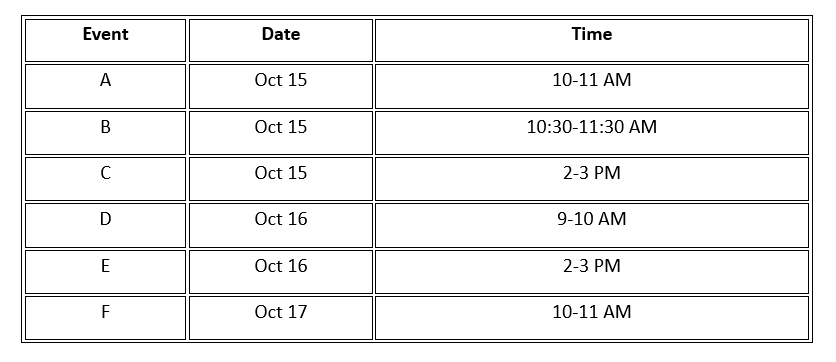

If we check all pairs, 6x6 = 36 checks i.e. $O(n^2)$

But if we **group by date** first:

•	Oct 15 group: A, B, C

•	Oct 16 group: D, E

•	Oct 17 group: F

Now we only check inside each group:

•	Oct 15: 3x3 = 9 checks

•	Oct 16: 2x2 = 4 checks

•	Oct 17: 1x1 = 1 check

Total = 9+4+1 = 14 checks instead of 36. That is much faster!

### **iv) Use of External Storage:**

For 1M+ events, we can either use a database or a file-backed structure (for ex., maybe a .csv, .json etc.)

•	Example: SQLite or Pandas Data Frame.

•	And load only relevant events into memory when needed.

**Why Databases Handle Large Data Better?**

•	They include built-in *query optimization*, so searches and updates are done efficiently.

•	They are designed to *store and manage billions of records* without slowing down.

•	Data is kept on disk, so it stays safe and *doesn’t get lost* when the program stops running.

## **3. Parallel Conflict Detection (Multi-Core Idea)**

Conflict detection means to check if any events overlap in time. Instead of checking all the pairs of events (which is slow), we can parallelize the process of checking:

The main idea for this: Divide the Events by Date

1.	Split events by date into smaller chunks. For ex., events from Jan-Mar go to Core 1, Apr-June go to Core 2, etc.

2.	Each core runs *conflict detection independently* within its subset.

3.	Then we combine the results at the end.

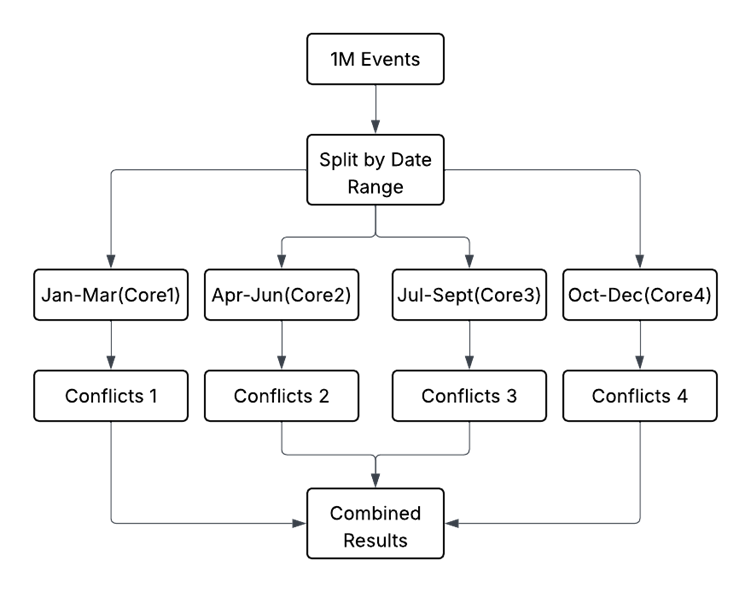

**Performance with Parallelization:**

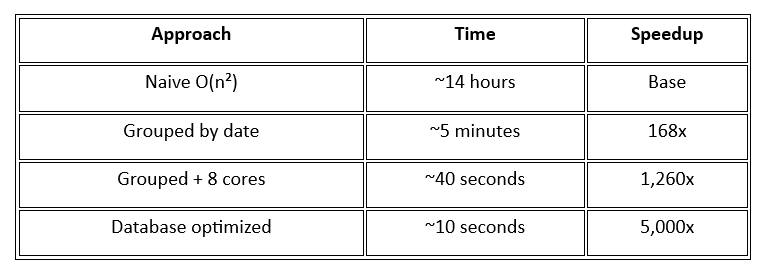

**Why This Works?**

•	Events that occur on different dates can’t overlap, so they can be checked separately.

•	Each core can work on its own set of events without needing to share data.

•	Using more cores speeds up the process almost in direct proportion - for example, 4 cores can make it about 4 times faster.

## Part E

Please see README.md